In [78]:
import numpy as np

import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense 
from keras.layers import Input, Dense
from keras import backend as K
from keras.models import load_model

##plot and visualize the data against time and observe how the feb 14-21 data is different from the rest of the data   

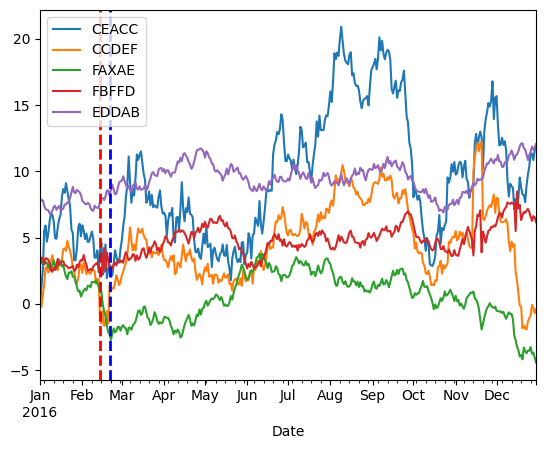

In [79]:
import matplotlib.pyplot as plt
df=pd.read_csv('anomaly_detection2.csv',parse_dates=['Date'])
# df_new=df.drop(['Date'],axis=1)
# df_new.plot()
df.set_index('Date',inplace=True)
df.plot()
plt.axvline(pd.to_datetime('2016-02-14'), color='r', linestyle='--', linewidth=2, label='Event 1')
plt.axvline(pd.to_datetime('2016-02-21'), color='b', linestyle='--', linewidth=2, label='Event 2')
plt.show()

In [80]:

import plotly.express as px
px.line(df,x=df.index,y=['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CEACC<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CEACC',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CEACC',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  1.23225977,  2.54012919, ..., 10.84136698, 11.58593208,
                          11.99195242]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=CCDEF<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CCDEF',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CCDEF',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        , -0.21730517,  0.60670884, ..., -0.31712651, -0.71042634,
                          -0.39958795]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FAXAE<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FAXAE',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FAXAE',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 3.        ,  3.19378003,  3.18095   , ..., -3.68039695, -4.04611568,
                          -4.43606537]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FBFFD<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FBFFD',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FBFFD',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([3.        , 3.48999178, 3.46481115, ..., 6.61749071, 6.51904081,
                          6.15513884]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=EDDAB<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'EDDAB',
    

###Data splitting

In [81]:
df.columns

Index(['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'], dtype='object')

In [82]:
##Training data is between (01/01/2016 to 09/30/2016) and test period: (10/01/2016 to 12/30/2016)
df.drop(['EDDAB'],axis=1,inplace=True)
train_df = df.loc['2016-03-01':'2016-07-30']
val_df=df.loc['2016-08-01':'2016-09-30']
anom_test_df=df.loc['2016-02-10':'2016-02-26']
norm_test_df = df.loc['2016-01-01':'2016-01-30']
monitored_period_df=df.loc['2016-01-01':'2016-09-30']
train_df.head(5)

test_df=df.loc['2016-10-01':'2016-12-30']


In [83]:
##create sequences out of time series data
def create_seq_data(data,seq_len):
    seq_data=[]
    for i in range(len(data)-seq_len):
        seq_data.append(data[i:i+seq_len])
    return np.array(seq_data)

In [84]:
seq_len=3
X_train_orig=create_seq_data(train_df,seq_len)
X_val_orig=create_seq_data(val_df,seq_len)
X_norm_test_orig=create_seq_data(norm_test_df,seq_len)
X_anom_test_orig=create_seq_data(anom_test_df,seq_len)

X_test_orig=create_seq_data(test_df,seq_len)
X_monitored_period_orig=create_seq_data(monitored_period_df,seq_len)

X_train=X_train_orig.reshape(-1,seq_len,train_df.shape[1])
# X_train=np.delete(X_train,[0,1],2).astype(float)
X_val=X_val_orig.reshape(-1,seq_len,val_df.shape[1])
X_norm_test=X_norm_test_orig.reshape(-1,seq_len,norm_test_df.shape[1])
X_anom_test=X_anom_test_orig.reshape(-1,seq_len,anom_test_df.shape[1])
X_monitored_period=X_monitored_period_orig.reshape(-1,seq_len,monitored_period_df.shape[1])

print(X_train.shape,X_val.shape,X_norm_test.shape,X_anom_test.shape)
print(X_anom_test)

X_test=X_test_orig.reshape(-1,seq_len,test_df.shape[1])

(149, 3, 4) (58, 3, 4) (27, 3, 4) (14, 3, 4)
[[[ 3.47375743  2.46131873  1.63080201  2.94813226]
  [ 3.50540838  1.51870379  1.77735609  3.01439663]
  [ 4.0316598   1.87873178  1.55120058  3.10151955]]

 [[ 3.50540838  1.51870379  1.77735609  3.01439663]
  [ 4.0316598   1.87873178  1.55120058  3.10151955]
  [ 2.39837124  1.86555262  1.31415201  2.70164389]]

 [[ 4.0316598   1.87873178  1.55120058  3.10151955]
  [ 2.39837124  1.86555262  1.31415201  2.70164389]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941]]

 [[ 2.39837124  1.86555262  1.31415201  2.70164389]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487]]

 [[ 4.04372489 -1.21956506  0.90519526  2.28898941]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938]]

 [[ 4.57628224 -1.49207064  0.89978188  2.13057487]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938]
  [ 2.4828375  -1.65876658 -0.55054584  4.21502256]]

 [[ 2.2

In [85]:
##retain the time stamps of vectors for future use
# X_train_dates=train_df.index[seq_len:]

# X_train_dates=pd.DataFrame({'Dates':train_df.index[seq_len:], 'CEACC':X_train_orig[:,0,0],'CCDEF':X_train_orig[:,0,1],'FAXAE':X_train_orig[:,0,2],'FBFFD':X_train_orig[:,0,3],'EDDAB':X_train_orig[:,0,4]})
# X_train_dates
X_anom_test_dates=pd.DataFrame({'Dates':anom_test_df.index[seq_len:], 'CEACC':X_anom_test_orig[:,0,0],'CCDEF':X_anom_test_orig[:,0,1],'FAXAE':X_anom_test_orig[:,0,2],'FBFFD':X_anom_test_orig[:,0,3]}) 
X_anom_test_dates

,Dates,CEACC,CCDEF,FAXAE,FBFFD
0,2016-02-13,3.473757,2.461319,1.630802,2.948132
1,2016-02-14,3.505408,1.518704,1.777356,3.014397
2,2016-02-15,4.031660,1.878732,1.551201,3.101520
3,2016-02-16,2.398371,1.865553,1.314152,2.701644
4,2016-02-17,4.043725,-1.219565,0.905195,2.288989
5,2016-02-18,4.576282,-1.492071,0.899782,2.130575
6,2016-02-19,2.210294,-0.576621,-0.044090,3.037759
7,2016-02-20,2.482837,-1.658767,-0.550546,4.215023
8,2016-02-21,4.480263,-1.545013,-0.934196,2.485914
9,2016-02-22,1.943677,-0.539503,-1.623672,3.877839


In [86]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed,BatchNormalization,RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error





In [87]:
n_features=X_train.shape[2]
n_timesteps=X_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n_features))
    ])
model.compile(optimizer='adam',loss=loss,metrics=metrics)
history=model.fit(X_train,X_train,epochs=100,batch_size=batch_size,validation_data=(X_val,X_val),shuffle=False,callbacks=[early_stopping])


Epoch 1/100


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 4.2169 - mae: 4.2169 - val_loss: 8.1593 - val_mae: 8.1593
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1857 - mae: 4.1857 - val_loss: 8.1179 - val_mae: 8.1179
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1522 - mae: 4.1522 - val_loss: 8.0705 - val_mae: 8.0705
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1119 - mae: 4.1119 - val_loss: 8.0120 - val_mae: 8.0120
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0614 - mae: 4.0614 - val_loss: 7.9354 - val_mae: 7.9354
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9975 - mae: 3.9975 - val_loss: 7.8318 - val_mae: 7.8318
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9172 - mae: 3.9172 - val_loss: 7.6929 - val_mae: 7.6929
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8181 - mae: 3.8181 - val_loss: 7.5147 - val_mae: 7.5147
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.6988 -

[4.435214996337891, 4.399069786071777, 4.358952045440674, 4.3102288246154785, 4.248493194580078, 4.1695733070373535, 4.070163726806641, 3.9479594230651855, 3.8019824028015137, 3.6325790882110596, 3.445192575454712, 3.2562947273254395, 3.085242509841919, 2.939275026321411, 2.815530776977539, 2.709681749343872, 2.6172406673431396, 2.536287307739258, 2.4646482467651367, 2.4013869762420654, 2.344820261001587, 2.294550895690918, 2.249662399291992, 2.209711790084839, 2.174217462539673, 2.142120599746704, 2.113347053527832, 2.087836742401123, 2.065117359161377, 2.045095682144165, 2.0272059440612793, 2.010977268218994, 1.9961462020874023, 1.9828919172286987, 1.970382809638977, 1.9584518671035767, 1.947453260421753, 1.9372353553771973, 1.9278218746185303, 1.918880820274353, 1.910449504852295, 1.902489423751831, 1.8951387405395508, 1.888144850730896, 1.8813494443893433, 1.8746472597122192, 1.8680888414382935, 1.861847996711731, 1.8558083772659302, 1.8500274419784546, 1.8444689512252808, 1.839099

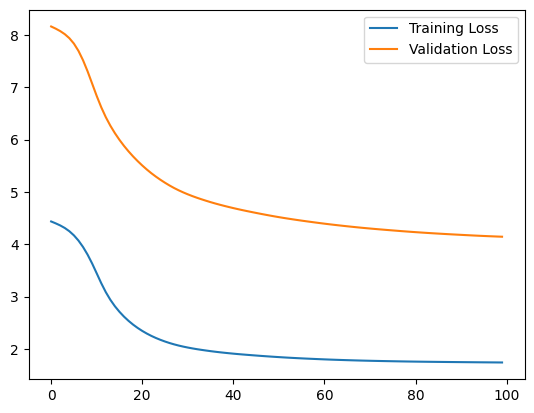

In [88]:
print(history.history["loss"])
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [89]:
recons_good_test_data=model.predict(X_norm_test)
norm_test_data_loss=tf.keras.losses.mae(recons_good_test_data,X_norm_test)

recons_anom_test_data=model.predict(X_anom_test)
anom_test_data_loss=tf.keras.losses.mae(recons_anom_test_data,X_anom_test)

norm_test_data_loss_mean=np.mean(norm_test_data_loss,axis=1)
anom_test_data_loss_mean=np.mean(anom_test_data_loss,axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


In [90]:
threshold=np.mean(test_loss_norm_data_mean)+3*np.std(test_loss_norm_data_mean)
print(threshold)

1.898840163817854


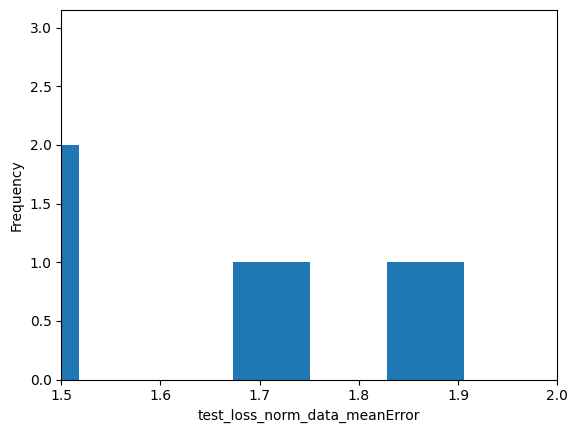

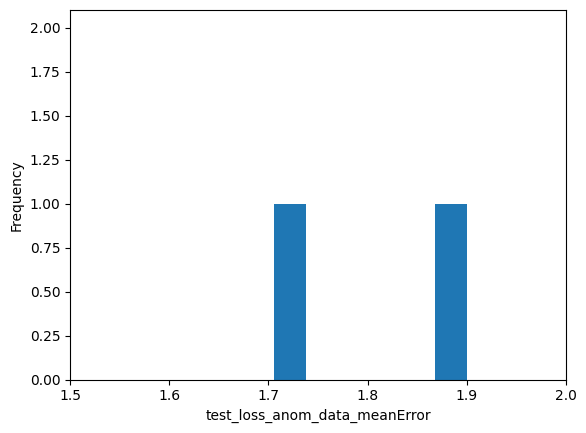

In [91]:
test_loss_norm_data_mean=np.mean(norm_test_data_loss,axis=1)
test_loss_anom_data_mean=np.mean(anom_test_data_loss,axis=1)

plt.hist(test_loss_norm_data_mean,bins=50)
plt.xlabel("test_loss_norm_data_meanError")
plt.ylabel("Frequency")
plt.xlim(1.5,2)
plt.show()


plt.hist(test_loss_anom_data_mean,bins=50)
plt.xlabel("test_loss_anom_data_meanError")
plt.ylabel("Frequency")
plt.xlim(1.5,2)
plt.show()

In [92]:
## predict the metrics for test data

# def predict(model,data,threshold):
recons_test_data=model.predict(X_test)
# print(X_test.shape)
data_loss_test=tf.keras.losses.mae(recons_test_data,X_test)
# print(data_loss)
data_loss_test_mean=tf.reduce_mean(data_loss_test,axis=1)
# print(data_loss_test_mean)
results_dated=pd.DataFrame({'Dates':test_df.index[seq_len:],'Loss':data_loss_test_mean})
display(results_dated)

##Normal plot
# results_dated.plot(x='Dates',y='Loss',figsize=(10,5))
# plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

####potly plots for interactivity

fig = px.line(results_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) 
# Add a threshold line threshold = 0.5 # Replace with the actual threshold value
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout 
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white') # Show the plot 




    # # anomalous_data_indices=np.where(data_loss_mean>threshold)
    # return tf.math.less(threshold,data_loss_mean)
# def print_stats(predcitions,labels):
#     print("Accuracy={} ".format(accuracy_score(labels,predictions)))
#     print("Precision={} ".format(precision_score(labels,predictions)))
#     print("Recall={} ".format(recall_score(labels,predictions)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Dates,Loss
0,2016-10-04,1.063833
1,2016-10-05,0.873978
2,2016-10-06,0.797709
3,2016-10-07,0.679358
4,2016-10-08,0.700325
...,...,...
83,2016-12-26,3.896110
84,2016-12-27,3.938081
85,2016-12-28,3.907574
86,2016-12-29,3.871200


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 10, 4, 0, 0),
                          datetime.datetime(2016, 10, 5, 0, 0),
                          datetime.datetime(2016, 10, 6, 0, 0),
                          datetime.datetime(2016, 10, 7, 0, 0),
                          datetime.datetime(2016, 10, 8, 0, 0),
                          datetime.datetime(2016, 10, 9, 0, 0),
                          datetime.datetime(2016, 10, 10, 0, 0),
                          datetime.datetime(2016, 10, 11, 0, 0),
                          datetime.datetime(2016, 10, 12, 0, 0),
                          datetime.datetime(2016, 10, 13, 0, 0),
                          datetime.datetime(2016, 10, 14, 0, 0),
                          datetime.datetime(2016, 10, 15, 0, 0),
                          datetime.datetime(2016, 10, 16, 0, 0),
                          datetime.datetime(2016, 10, 17, 0, 0),
                          datetime.datetime(2016, 10, 18, 0, 0),
                          datetime.datetime(2016, 10, 19, 0, 0),
                          datetime.datetime(2016, 10, 20, 0, 0),
                          datetime.datetime(2016, 10, 21, 0, 0),
                          datetime.datetime(2016, 10, 22, 0, 0),
                          datetime.datetime(2016, 10, 23, 0, 0),
                          datetime.datetime(2016, 10, 24, 0, 0),
                          datetime.datetime(2016, 10, 25, 0, 0),
                          datetime.datetime(2016, 10, 26, 0, 0),
                          datetime.datetime(2016, 10, 27, 0, 0),
                          datetime.datetime(2016, 10, 28, 0, 0),
                          datetime.datetime(2016, 10, 29, 0, 0),
                          datetime.datetime(2016, 10, 30, 0, 0),
                          datetime.datetime(2016, 10, 31, 0, 0),
                          datetime.datetime(2016, 11, 1, 0, 0),
                          datetime.datetime(2016, 11, 2, 0, 0),
                          datetime.datetime(2016, 11, 3, 0, 0),
                          datetime.datetime(2016, 11, 4, 0, 0),
                          datetime.datetime(2016, 11, 5, 0, 0),
                          datetime.datetime(2016, 11, 6, 0, 0),
                          datetime.datetime(2016, 11, 7, 0, 0),
                          datetime.datetime(2016, 11, 8, 0, 0),
                          datetime.datetime(2016, 11, 9, 0, 0),
                          datetime.datetime(2016, 11, 10, 0, 0),
                          datetime.datetime(2016, 11, 11, 0, 0),
                          datetime.datetime(2016, 11, 12, 0, 0),
                          datetime.datetime(2016, 11, 13, 0, 0),
                          datetime.datetime(2016, 11, 14, 0, 0),
                          datetime.datetime(2016, 11, 15, 0, 0),
                          datetime.datetime(2016, 11, 16, 0, 0),
                          datetime.datetime(2016, 11, 17, 0, 0),
                          datetime.datetime(2016, 11, 18, 0, 0),
                          datetime.datetime(2016, 11, 19, 0, 0),
                          datetime.datetime(2016, 11, 20, 0, 0),
                          datetime.datetime(2016, 11, 21, 0, 0),
                          datetime.datetime(2016, 11, 22, 0, 0),
                          datetime.datetime(2016, 11, 23, 0, 0),
                          datetime.datetime(2016, 11, 24, 0, 0),
                          datetime.datetime(2016, 11, 25, 0, 0),
                          datetime.datetime(2016, 11, 26, 0, 0),
                          datetime.datetime(2016, 11, 27, 0, 0),
                          datetime.datetime(2016, 11, 28, 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
(271, 3, 4)
tf.Tensor(
[2.99101229 2.46267239 1.82949701 1.47432231 1.37652916 1.36497118
 1.17100295 1.13445021 1.25506758 1.49767899 1.50620044 1.39751098
 1.28057006 1.14878761 1.09642857 1.05300711 1.10118913 1.23907423
 1.19660396 1.17474635 1.1205209  1.21002196 1.35464949 1.44724111
 1.68046095 1.87970543 1.73035285 1.3401751  1.18209818 1.15078087
 1.06292775 1.09952937 1.12431169 1.31245119 1.4006795  1.44732314
 1.34939097 1.24906439 1.37750027 1.58457432 1.70544348 1.89288838
 2.17060018 2.49621714 2.76622062 2.89278239 3.02974316 3.17159575
 3.2832341  3.26747375 3.32628015 3.20502666 3.16758376 2.86533902
 2.65072503 2.55016009 2.58892355 2.56237002 2.38702753 2.08428928
 1.72962298 1.47023311 1.51253718 1.83560082 2.15158571 2.10902556
 1.83271721 1.55917973 1.64176696 1.86043591 2.13780784 2.31310106
 2.35430711 2.28026476 2.05825971 1.82921374 1.57175046 1.39727566
 1.30713543 1.274023   1.3473098  1.23755603 1.05627482 1.00000961
 

,Dates,Loss
0,2016-01-04,2.991012
1,2016-01-05,2.462672
2,2016-01-06,1.829497
3,2016-01-07,1.474322
4,2016-01-08,1.376529
...,...,...
266,2016-09-26,4.333874
267,2016-09-27,4.036102
268,2016-09-28,3.621961
269,2016-09-29,3.125007


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 1, 4, 0, 0),
                          datetime.datetime(2016, 1, 5, 0, 0),
                          datetime.datetime(2016, 1, 6, 0, 0), ...,
                          datetime.datetime(2016, 9, 28, 0, 0),
                          datetime.datetime(2016, 9, 29, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2.99101229, 2.46267239, 1.82949701, ..., 3.62196101, 3.12500676,
                          2.81354313]),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'Threshold',
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'x domain',
                                'y': 1.898840163817854,
                                'yanchor': 'bottom',
                                'yref': 'y'}],
               'legend': {'title': {'text': 'Legend'}, 'tracegroupgap': 0},
               'shapes': [{'line': {'color': 'red', 'dash': 'dash', 'width': 2},
                           'type': 'line',
                           'x0': 0,
                           'x1': 1,
                           'xref': 'x domain',
                           'y0': 1.898840163817854,
                           'y1': 1.898840163817854,
                           'yref': 'y'}],
               'template': '...',
               'title': {'text': 'Loss vs. Dates'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Dates'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

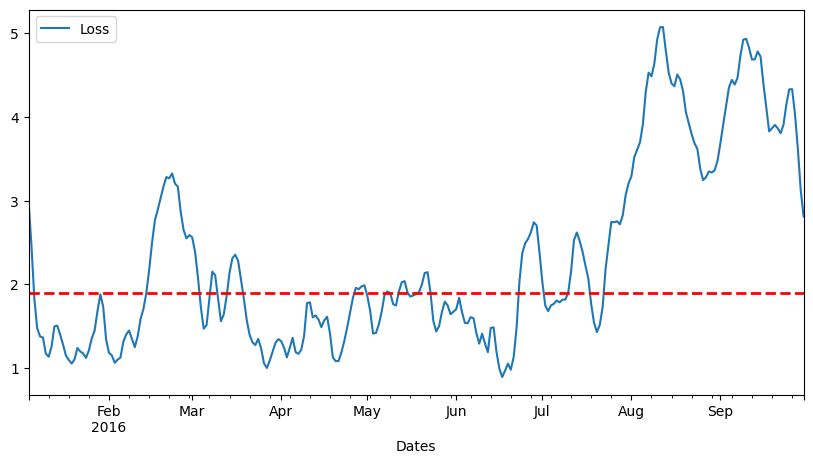

In [93]:
##plot the results for monitored period data to see number of anomalies and if the Feb 14 anaomaly is the only one being captured
recons_monitored_data=model.predict(X_monitored_period)
print(X_monitored_period.shape)
data_loss_monitored=tf.keras.losses.mae(recons_monitored_data,X_monitored_period)
# print(data_loss)
data_loss_monitored_mean=tf.reduce_mean(data_loss_monitored,axis=1)
print(data_loss_monitored_mean)
chk_monitored_data_dated=pd.DataFrame({'Dates':monitored_period_df.index[seq_len:],'Loss':data_loss_monitored_mean})
display(chk_monitored_data_dated)
chk_monitored_data_dated.plot(x='Dates',y='Loss',figsize=(10,5))
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

###plot plotly plots for train data to analyze 

fig = px.line(chk_monitored_data_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) # Add a threshold line threshold = 0.5 # Replace with the actual threshold value 
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white' ) # Show the plot fig.show()

In [94]:
preds=predict(model,X_test,threshold)
preds.dtype
num_true=tf.cast(tf.math.count_nonzero(preds),tf.int32)
num_false=tf.cast(tf.size(preds)-num_true,tf.int32)
print("Number of anomalies detected: ",num_true.numpy())

NameError: name 'predict' is not defined

In [15]:
# import sklearn.metrics as metrics
# from sklearn.metrics import accuracy_score,precision_score,recall_score
# preds=predict(model,X_test,threshold)
# preds.dtype
# num_true=tf.cast(tf.math.count_nonzero(preds),tf.int32)
# num_